In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import learning.utils as ut
from learning.models import NN as Net

system_name = 'dql_const'
run_name = 'rew2'
data_dir = './data/' + system_name + '/' + run_name + '/'

#plot_dir = '../plots/'+system_name+'/'+run_name+'/'

## Learning of the 3d kite - relative velocity angle- with sarsa

In [2]:
params = ut.read_params(data_dir+'parameters.txt')
for ep in params:
    print(ep, params[ep])

integration_step 0.001
episode_duration 300.0
learning_step 0.2
penalty 100.0
wind_type const
v_wind_x 10.0
v_wind_y 0.0
v_wind_z 0.0
learning_type dql
gamma 1.0
episodes 5.0
eta0 0.0001
eta_decay_start 2000.0
eta_decay_rate 0.9
eta_c 1000.0
eps0 0.01
eps_decay_start 1500000.0
eps_decay_rate 1.3
eps_c 1.0
optimizer sgd
loss mse
max_power 0.0


In [64]:
# read durations and returns
d_traj, r_traj = ut.read_traj(data_dir+'/return.txt')

l_steps = np.cumsum(d_traj)
print(l_steps)

[      31       40     1540 ... 11495625 11497125 11498625]


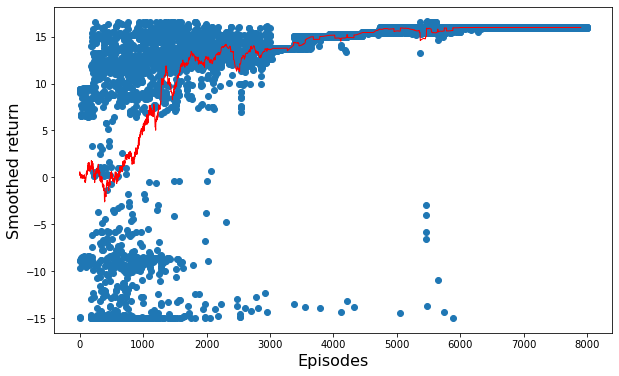

In [65]:
plt.figure(figsize=(10,6))
plt.xlabel('Episodes', fontsize=16)
plt.ylabel('Smoothed return', fontsize=16)

plt.plot(r_traj, 'o')

smooth = np.convolve(r_traj, np.ones(100), "valid")/100
plt.plot(smooth, color='red', lw=1)

plt.savefig('return.png', dpi=200)
plt.show()

[-15.         -14.99999995 -14.99999993 ...  16.60781296  16.60908912
  16.61911321]


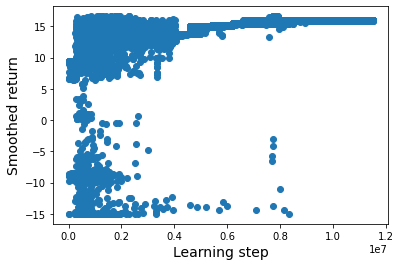

In [16]:
plt.xlabel('Learning step', fontsize=14)
plt.ylabel('Smoothed return', fontsize=14)
print(np.unique(r_traj))
plt.plot(l_steps, r_traj, 'o')

#smooth = np.convolve(r_traj, np.ones(100))/100
#plt.plot(l_steps, smooth, color='red', lw=3)

plt.show()

(75001, 15, 7, 3, 3)
(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))


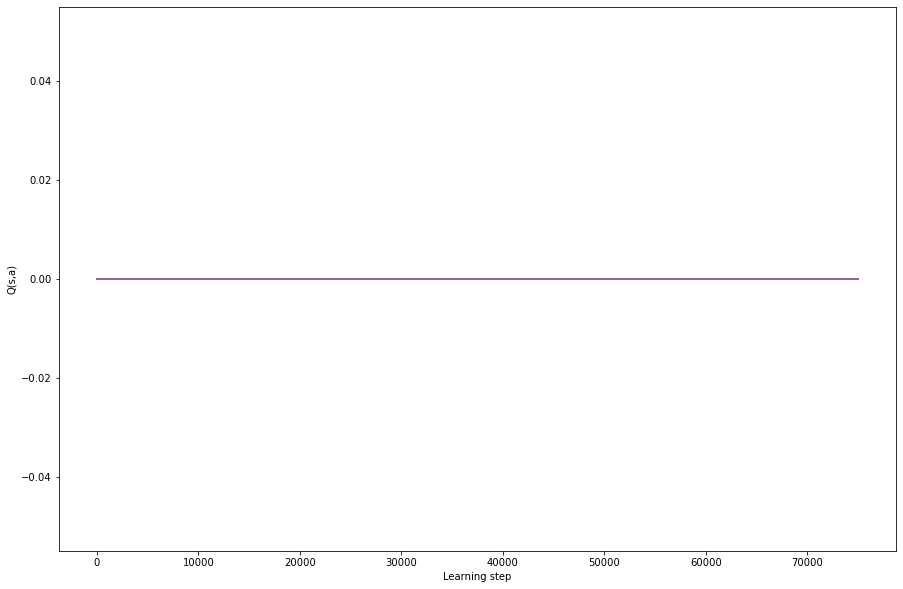

(5, 0, 0, 0)


In [6]:
Q_traj = np.load(data_dir+"quality_traj.npy")
print(Q_traj.shape)

Q_traj = Q_traj.reshape(Q_traj.shape[0], -1)
#print(Q_traj.shape)

plt.figure(figsize = (15,10))
for i in range(Q_traj.shape[1]):
#for i in [315]:
    plt.plot(Q_traj[::1,i], '-')
print(np.unravel_index(np.where(Q_traj[0]>16.5)[0], (15,7,3,3)))
plt.ylabel("Q(s,a)")
plt.xlabel("Learning step")
plt.savefig(data_dir+"quality_traj.png")
plt.show()
print(np.unravel_index(315, (15,7,3,3)))

In [3]:
import torch
from sklearn.manifold import TSNE as TSNE
from sklearn.decomposition import PCA as PCA

import seaborn as sns

In [4]:
net=Net()
net.load_state_dict(torch.load(data_dir+"best_weights.h5"))
n_attack=15
n_bank=7
i=0
R = np.zeros((105*1, 32))
for attack in range(n_attack):
    for bank in range(n_bank):
        for beta in np.linspace(-1,1,1):
            attack_f=attack-(n_attack/2)
            bank_f=bank-(n_bank/2)
            attack_f /= n_attack
            bank_f /= n_bank
            
            repre,_=net(torch.tensor([attack_f, bank_f]).float())
            R[i] = np.array(repre.detach().numpy())
            i+=1

In [60]:
for n,p in net.named_parameters():
    print(p)

Parameter containing:
tensor([[ 4.2896e-01, -6.9584e-01, -2.1697e-01],
        [ 4.8072e-01, -2.9269e-02, -4.6391e-01],
        [-5.7207e-01, -3.0163e-01, -3.6357e-01],
        [-8.6348e-01, -4.5596e-01, -1.4566e-01],
        [-1.8087e-01, -5.3290e-01, -3.2780e-01],
        [ 5.9353e-02,  2.5271e-01,  3.6473e-02],
        [-4.2865e-01, -5.1168e-01,  5.3028e-01],
        [-1.9461e-01, -4.2698e-02, -2.6070e-01],
        [-3.4978e-02, -9.4974e-02,  2.0225e-01],
        [ 1.2888e-01, -4.7554e-01, -2.2585e-01],
        [-1.0832e-01, -1.2932e-01, -2.2277e-01],
        [ 5.6683e-01, -4.4512e-01, -4.1767e-01],
        [-4.1106e-01, -3.4001e-01, -4.7137e-01],
        [ 6.4923e-01,  5.4792e-01, -1.1568e-01],
        [ 1.6052e-01, -7.2046e-03,  9.3585e-02],
        [ 2.5249e-01,  1.1439e-01, -1.6397e-01],
        [-2.3867e-01,  1.1126e-01,  3.7740e-01],
        [-9.3563e-02, -3.0238e-01,  3.2362e-01],
        [-9.5310e-02, -3.3782e-01,  4.2739e-01],
        [-8.8344e-01, -2.2363e-01, -5.3203e-03]

In [36]:
print((R[0,0]))

0.0


In [5]:
pca = PCA(n_components=32)
R_pca=pca.fit_transform(R)

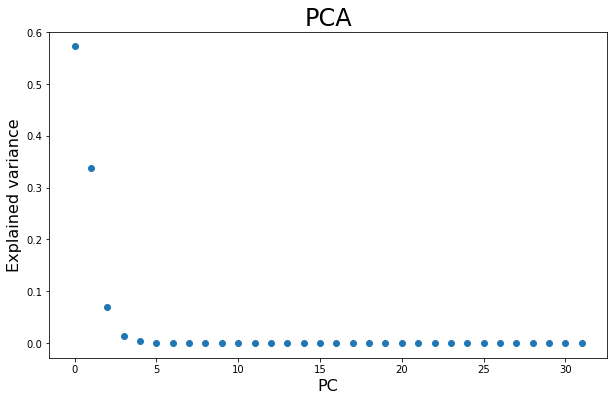

In [14]:
plt.figure(figsize=(10,6))
plt.title("PCA", fontsize=24)
plt.ylabel("Explained variance", fontsize=16)
plt.xlabel("PC", fontsize=16)
plt.plot(pca.explained_variance_ratio_, 'o')
plt.savefig("exp_var.png")


In [7]:
R_embedded = TSNE(n_components=2, init='random').fit_transform(R)

In [8]:
R_embedded.shape

(105, 2)

In [9]:
R_pca.shape

(105, 32)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


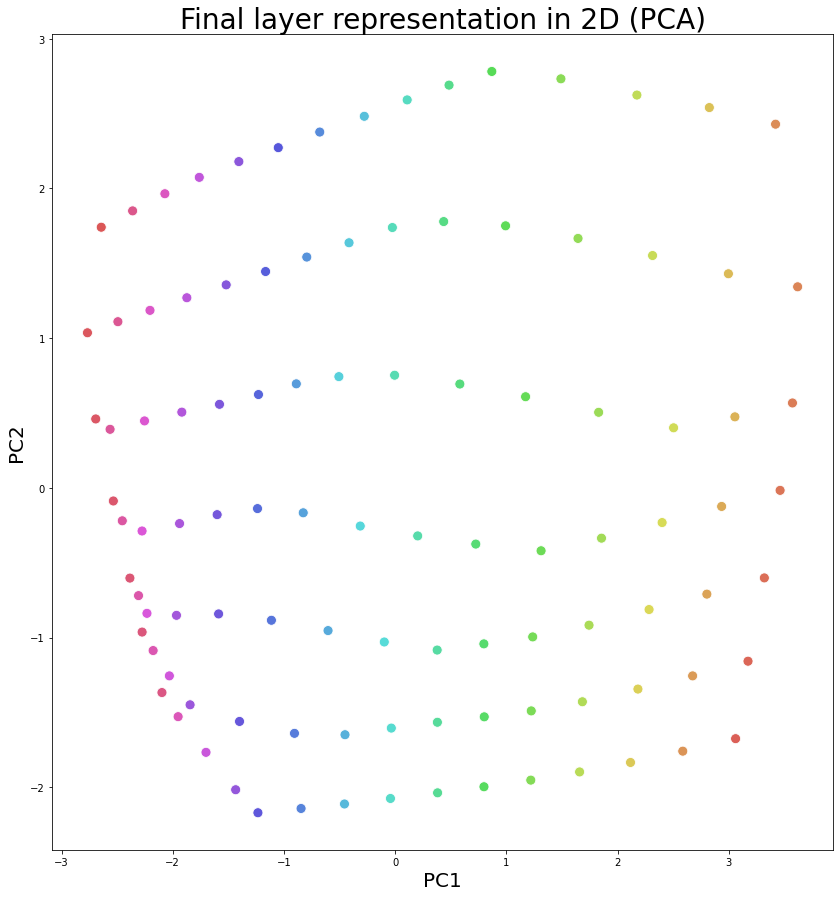

In [11]:
'''
fig=plt.figure(figsize=(15,15))
ax=plt.axes(projection='3d')
for i in range(10):
    ax.plot3D(R_pca[i*105:(i+1)*105,0], R_pca[i*105:(i+1)*105,1], R_pca[i*105:(i+1)*105,2], 'o')

'''
plt.figure(figsize=(14,15))
plt.title("Final layer representation in 2D (PCA)", fontsize=28)
plt.xlabel("PC1", fontsize=20)
plt.ylabel("PC2", fontsize=20)
sns.scatterplot(x=R_pca[:,0], y=R_pca[:,1], hue=np.arange(105), palette=sns.color_palette("hls", 105), s=100)
#plt.plot(R_pca[:,0], R_pca[:,1], 'o', markersize=5)
print((np.arange(1050)//105)[:130])
plt.legend([],[], frameon=False)
plt.savefig("pca.png")
#plt.plot(R_pca[::7,0], R_pca[::7,1], 'o')


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


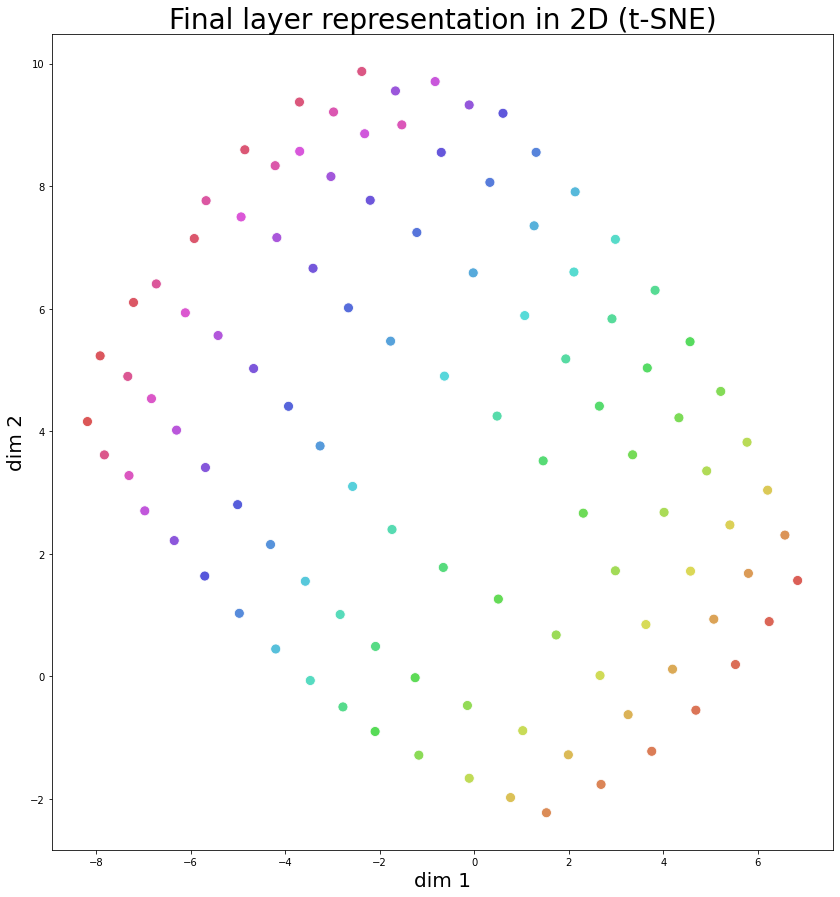

In [13]:
plt.figure(figsize=(14,15))
plt.title("Final layer representation in 2D (t-SNE)", fontsize=28)
plt.xlabel("dim 1", fontsize=20)
plt.ylabel("dim 2", fontsize=20)
sns.scatterplot(x=R_embedded[::,0], y=R_embedded[::,1], hue=np.arange(105), palette=sns.color_palette("hls", 105), s=100)
#plt.plot(R_pca[:,0], R_pca[:,1], 'o', markersize=5)
print((np.arange(1050)//105)[:130])
plt.legend([],[], frameon=False)
plt.savefig("tsne.png")

array([2.13467312, 0.        , 0.        , 1.5501982 , 0.84888232,
       0.        , 0.        , 1.56766438, 0.77454907, 0.        ,
       0.11053669, 0.        , 1.18088925, 1.92944264, 0.0129084 ,
       0.        , 0.        , 0.        , 2.62349176, 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.06660795,
       0.        , 4.89560366, 3.40538549, 0.        , 0.        ,
       0.01651768, 0.        ])

In [636]:
np.unravel_index(315, (15,7,3,3))

(5, 0, 0, 0)

In [529]:
Q_traj[-2]

array([ 2.15204805e-02, -2.11206172e-02,  4.78516612e-03,  1.19567020e-02,
       -2.09355578e-02, -2.37459429e-02,  6.38690144e-02,  5.20869344e-03,
        2.86460686e-02,  3.79391834e-02, -6.58371393e-03,  3.30936885e-03,
        2.26558577e-02, -1.43574914e-02, -1.45102879e-02,  3.29327732e-02,
        8.88034818e-04,  1.77001767e-02,  1.10998666e-02, -3.94785590e-03,
        1.27858936e-03,  6.42954279e-03, -5.44082839e-03, -5.59040625e-03,
        1.41397119e-02,  5.90523239e-04,  6.96304534e-03,  1.07115181e-02,
       -1.11123668e-02,  3.49194417e-03,  7.19226338e-03, -9.77131166e-03,
       -1.13288602e-02,  2.92954464e-02,  5.66343963e-03,  1.49531337e-02,
        1.84105653e-02, -5.22929663e-03,  1.79883221e-03,  1.05802212e-02,
       -7.06903590e-03, -6.91259559e-03,  1.73805729e-02,  8.05086223e-04,
        9.08149872e-03,  1.37961814e-02, -8.77491105e-03,  1.99340307e-03,
        9.58276168e-03, -1.15466611e-02, -1.18855834e-02,  3.06534581e-02,
        2.64342828e-03,  

In [390]:
print(Q_traj[23])

[-8.01200196e-02 -6.23032935e-02  7.08861426e-02 -8.01245719e-02
  8.59576687e-02  5.64475432e-02  2.52074227e-02 -6.88933730e-02
  1.60060078e-02  3.06336358e-02 -4.44923863e-02  1.40430778e-03
  1.25314295e-02  5.45168668e-03 -4.45839055e-02 -3.88501585e-03
 -9.07983035e-02 -6.87588453e-02 -4.74253856e-02 -1.86311156e-02
  2.39490047e-02  7.45102540e-02 -3.46740633e-02 -6.14173338e-02
  9.71913710e-02 -7.74632841e-02 -4.19387445e-02  5.06117269e-02
 -4.56308648e-02 -7.69285187e-02 -7.90566206e-02 -5.51479459e-02
 -7.85043165e-02  4.38386276e-02  2.51415893e-02  7.16298297e-02
 -9.66764987e-02 -6.46222830e-02  3.39891762e-03  3.71424183e-02
 -1.50186494e-02 -7.07396567e-02  2.73789465e-03  5.37099615e-02
 -8.10789466e-02 -7.72016197e-02  5.86106554e-02 -5.28184138e-02
  1.37247443e-02 -9.61970538e-03 -6.03200980e-02 -3.33667472e-02
  1.62900090e-02  4.14363518e-02 -1.60255283e-03  8.96440968e-02
 -1.35011822e-02  8.07376578e-02 -7.38925934e-02 -4.69868816e-02
 -5.18087074e-02  5.17715

In [71]:
Q_traj[100000].shape

IndexError: index 100000 is out of bounds for axis 0 with size 30001

In [ ]:
print(np.where(Q_traj[100000]>16)[0])

In [10]:
input=np.zeros(105)
S_t=(10, 3)
input[S_t[0]*15+S_t[1]]=1

IndexError: index 153 is out of bounds for axis 0 with size 105

In [553]:
import torch
torch.nn.functional.one_hot(torch.tensor([1*7+4]), num_classes=105).reshape(15, 7)

tensor([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]])

[0.00022046 0.00013604 0.00013838 ... 0.         0.         0.        ]


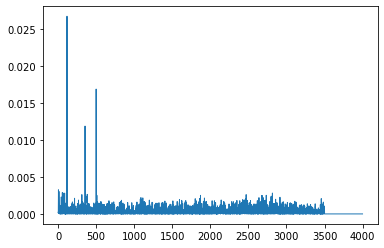

In [63]:
l = np.load(data_dir+"loss_traj.npy")
print(l[8000:12000])
plt.plot(l[8000:12000], lw=1)
plt.show()

In [74]:
Q = np.load(data_dir+"best_quality.npy")
#ind = np.argmax(Q_traj[4800])
#np.unravel_index(ind, Q.shape)

FileNotFoundError: [Errno 2] No such file or directory: './data/dql_const/state_of_art/best_quality.npy'

In [75]:
beta_importance=np.mean(np.var(Q, axis=2))

In [76]:
np.var(Q, axis=0).shape

(7, 1, 3, 3)

In [77]:
beta_importance

0.0

In [78]:
np.var(Q)

0.24340283029431797

In [79]:
att_importance=np.mean(np.var(Q, axis=0))
bank_importance=np.mean(np.var(Q, axis=1))
print(att_importance, bank_importance)

0.19595938513112895 0.19133971057069318


[25.          0.         43.30127019]


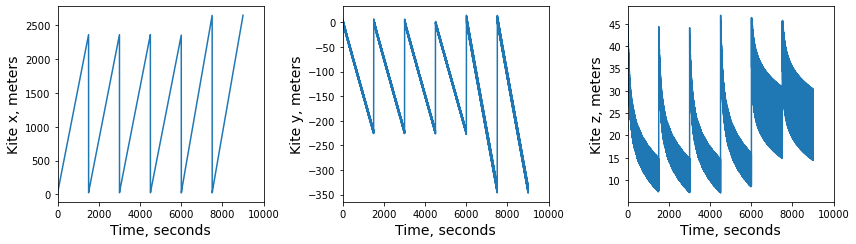

In [109]:
coordinates = np.load(data_dir+"eval_traj.npy")
controls = np.load(data_dir+"contr_traj.npy")
print(coordinates[0])

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

lim = [0,10000]

ax1.set_xlim(lim)
ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Kite x, meters', fontsize=14)
ax1.plot(coordinates[:,0])

ax2.set_xlim(lim)
ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Kite y, meters', fontsize=14)
ax2.plot(coordinates[:,1])

ax3.set_xlim(lim)
ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Kite z, meters', fontsize=14)
ax3.plot(coordinates[:,2])

plt.tight_layout()
plt.savefig(data_dir+"eval_traj.png", dpi=200)
plt.show()

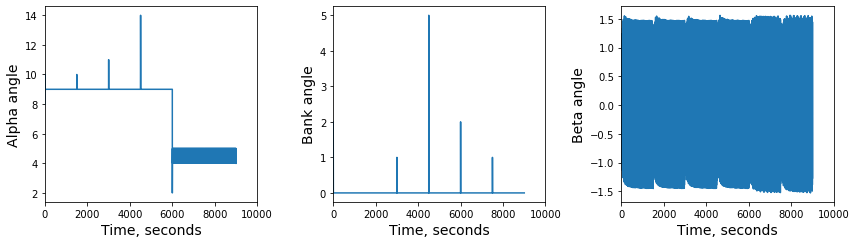

In [110]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

lim = [0,10000]

ax1.set_xlim(lim)
ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Alpha angle', fontsize=14)
ax1.plot(controls[:,0])

ax2.set_xlim(lim)
ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Bank angle', fontsize=14)
ax2.plot(controls[:,1])

ax3.set_xlim(lim)
ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Beta angle', fontsize=14)
ax3.plot(controls[:,2])

plt.tight_layout()
plt.savefig(data_dir+"contr_traj.png", dpi=200)
plt.show()

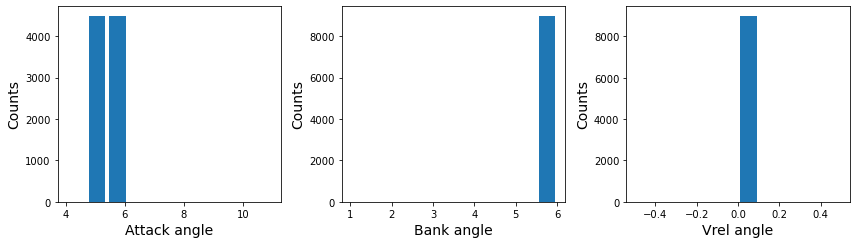

In [95]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

ax1.set_ylabel('Counts', fontsize=14)
ax1.set_xlabel('Attack angle', fontsize=14)
ax1.hist(controls[:,0], align='mid', rwidth=0.8)

ax2.set_ylabel('Counts', fontsize=14)
ax2.set_xlabel('Bank angle', fontsize=14)
ax2.hist(controls[:,1], align='mid', rwidth=0.8)

ax3.set_ylabel('Counts', fontsize=14)
ax3.set_xlabel('Vrel angle', fontsize=14)
ax3.hist(controls[:,2], align='mid', rwidth=0.8)

plt.tight_layout()
plt.savefig(data_dir+"contr_hist.png", dpi=200)
plt.show()